In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
! gdown --id 1htbeuZKg5CVe33f3KjAirpCtxM5MgB21

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1htbeuZKg5CVe33f3KjAirpCtxM5MgB21
To: /content/Копия Data Sample (AIC) для итоговой работы (new) - Online Retail.csv
100% 4.56M/4.56M [00:00<00:00, 15.3MB/s]


In [3]:
df = pd.read_csv('/content/Копия Data Sample (AIC) для итоговой работы (new) - Online Retail.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,"2,75",17850.0,United Kingdom


In [5]:
# Перевожу названия столбцов в читаемый вид
df.columns.str.lower()
df.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   invoice_no    54214 non-null  object 
 1   stock_code    54214 non-null  object 
 2   description   54080 non-null  object 
 3   quantity      54214 non-null  int64  
 4   invoice_date  54214 non-null  object 
 5   unit_price    54214 non-null  object 
 6   customer_id   40643 non-null  float64
 7   country       54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


Готовим данные для отчета по продажам

In [7]:
# преобразую unit_price в число
df['unit_price'] = df['unit_price'].str.replace(',', '.').astype(float)


In [8]:
# преобразую invoice_date в timestamp
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [9]:
# Сколько годов в датафрейме
df['invoice_date'].dt.year.value_counts()

2020    49970
2019     4244
Name: invoice_date, dtype: int64

In [10]:
# округляем дату до первого числа для группировки по месяцам
df['invoice_month'] = df['invoice_date'].to_numpy().astype('datetime64[M]')

In [11]:
# считаем сумму транзакции
df['amount'] = df['quantity'] * df['unit_price']

In [12]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-01,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,2019-12-01,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047.0,United Kingdom,2019-12-01,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047.0,United Kingdom,2019-12-01,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850.0,United Kingdom,2019-12-01,22.00


In [13]:
# Находим отсутствующие значения
df.isna().sum()

invoice_no           0
stock_code           0
description        134
quantity             0
invoice_date         0
unit_price           0
customer_id      13571
country              0
invoice_month        0
amount               0
dtype: int64

In [14]:
# Заменяю на 0
df = df.fillna(0)
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-01,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,2019-12-01,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047.0,United Kingdom,2019-12-01,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047.0,United Kingdom,2019-12-01,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850.0,United Kingdom,2019-12-01,22.00
...,...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2020-12-09 12:31:00,0.85,15804.0,United Kingdom,2020-12-01,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,2020-12-09 12:31:00,2.08,15804.0,United Kingdom,2020-12-01,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2020-12-09 12:31:00,0.42,15804.0,United Kingdom,2020-12-01,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2020-12-09 12:50:00,1.95,12680.0,France,2020-12-01,23.40


# ИССЛЕДУЕМ АНОМАЛИИ

In [15]:
# исследуем invoice_no (нашли строки, содержащие не только номер)
t_invoice_no = df[(df['invoice_no'].str.isdigit() == False)]

In [16]:
# Возвраты
t_invoice_no

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311.0,United Kingdom,2019-12-01,-4.65
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom,2019-12-01,-6.96
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2019-12-01 10:24:00,0.29,17548.0,United Kingdom,2019-12-01,-6.96
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2019-12-01 14:33:00,1.45,12472.0,Germany,2019-12-01,-1.45
375,C536642,21463,MIRRORED DISCO BALL,-1,2019-12-02 11:56:00,5.95,14390.0,United Kingdom,2019-12-01,-5.95
...,...,...,...,...,...,...,...,...,...,...
53704,C581229,79191C,RETRO PLASTIC ELEPHANT TRAY,-24,2020-12-08 10:14:00,0.85,12558.0,USA,2020-12-01,-20.40
53705,C581229,21507,ELEPHANT BIRTHDAY CARD,-12,2020-12-08 10:14:00,0.42,12558.0,USA,2020-12-01,-5.04
53765,C581322,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,2020-12-08 11:51:00,2.95,18223.0,United Kingdom,2020-12-01,-2.95
53770,C581330,22959,WRAP CHRISTMAS VILLAGE,-25,2020-12-08 11:57:00,0.42,15877.0,United Kingdom,2020-12-01,-10.50


In [17]:
# исследуем stock_code
df.sort_values('stock_code', ascending= False)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
9535,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2020-02-17 15:51:00,25.00,0.0,United Kingdom,2020-02-01,25.00
31793,564762,gift_0001_10,0,30,2020-08-30 10:48:00,0.00,0.0,United Kingdom,2020-08-01,0.00
38977,C570456,S,SAMPLES,-1,2020-10-10 15:38:00,98.18,0.0,United Kingdom,2020-10-01,-98.18
9814,C544580,S,SAMPLES,-1,2020-02-21 14:25:00,5.44,0.0,United Kingdom,2020-02-01,-5.44
9815,C544581,S,SAMPLES,-1,2020-02-21 14:32:00,55.00,0.0,United Kingdom,2020-02-01,-55.00
...,...,...,...,...,...,...,...,...,...,...
6645,541698,10002,INFLATABLE POLITICAL GLOBE,18,2020-01-20 19:16:00,0.85,14713.0,United Kingdom,2020-01-01,15.30
12767,547063,10002,INFLATABLE POLITICAL GLOBE,4,2020-03-20 13:33:00,0.85,14769.0,United Kingdom,2020-03-01,3.40
2339,538255,10002,INFLATABLE POLITICAL GLOBE,12,2019-12-10 12:33:00,0.85,14911.0,EIRE,2019-12-01,10.20
556,536865,10002,INFLATABLE POLITICAL GLOBE,5,2019-12-03 11:28:00,1.66,0.0,United Kingdom,2019-12-01,8.30


In [18]:
stock_anomal_1 = df.loc[df['stock_code'].str.len() < 5]
stock_anomal_1['stock_code'].value_counts()

POST    119
DOT      76
M        57
C2       16
D        13
S         6
CRUK      3
Name: stock_code, dtype: int64

In [20]:
stock_anomal_2 = df[(df['stock_code'].str.isalpha() == True) | (df['stock_code'].str.count(' ') > 0) | (df['stock_code'] == 'gift_0001_10') | (df['stock_code'] == 'gift_0001_30')]
stock_anomal_2['stock_code'].value_counts()

POST            119
DOT              76
M                57
D                13
S                 6
BANK CHARGES      4
CRUK              3
AMAZONFEE         2
gift_0001_30      1
DCGSSGIRL         1
gift_0001_10      1
Name: stock_code, dtype: int64

In [21]:
# расходы/ доходы
Cost = df[(df['stock_code'] == 'POST') | (df['stock_code'] == 'DOT') | (df['stock_code'] == 'M') | (df['stock_code'] == 'D') |
         (df['stock_code'] == 'S') | (df['stock_code'] == 'BANK CHARGES') | (df['stock_code'] == 'CRUK') | (df['stock_code'] == 'AMAZONFEE') |
          (df['stock_code'] == 'gift_0001_30') | (df['stock_code'] == 'gift_0001_10') |  (df['stock_code'] == 'C2')]
Cost

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
577,536865,M,Manual,1,2019-12-03 11:28:00,2.55,0.0,United Kingdom,2019-12-01,2.55
929,537197,POST,POSTAGE,3,2019-12-05 14:02:00,18.00,12647.0,Germany,2019-12-01,54.00
1580,537643,DOT,DOTCOM POSTAGE,1,2019-12-07 15:34:00,593.15,0.0,United Kingdom,2019-12-01,593.15
1669,537673,POST,POSTAGE,7,2019-12-08 09:49:00,18.00,12709.0,Germany,2019-12-01,126.00
1778,537800,M,Manual,12,2019-12-08 13:08:00,0.19,12748.0,United Kingdom,2019-12-01,2.28
...,...,...,...,...,...,...,...,...,...,...
52011,580154,POST,POSTAGE,1,2020-12-02 10:24:00,18.00,12569.0,Germany,2020-12-01,18.00
52066,C580263,M,Manual,-16,2020-12-02 12:43:00,0.29,12536.0,France,2020-12-01,-4.64
52605,580648,POST,POSTAGE,1,2020-12-05 13:15:00,18.00,12628.0,Germany,2020-12-01,18.00
53312,581000,POST,POSTAGE,5,2020-12-07 08:03:00,18.00,12720.0,Germany,2020-12-01,90.00


In [22]:
# исследуем description
t_description = df[(df['description'].str.islower() == True)]

In [23]:
t_description.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
5538,540978,84050,counted,-310,2020-01-12 15:04:00,0.0,0.0,United Kingdom,2020-01-01,-0.0
11573,546018,85172,wrongly sold as sets,-600,2020-03-08 17:23:00,0.0,0.0,United Kingdom,2020-03-01,-0.0
11921,546407,22719,wrong barcode (22467),-178,2020-03-11 16:24:00,0.0,0.0,United Kingdom,2020-03-01,-0.0
13309,547559,72759,thrown away-can't sell.,-524,2020-03-23 17:27:00,0.0,0.0,United Kingdom,2020-03-01,-0.0
13442,547704,21621,rcvd be air temp fix for dotcom sit,100,2020-03-24 17:51:00,0.0,0.0,United Kingdom,2020-03-01,0.0


In [24]:
# Расходы по складу
t_description.groupby('description')['amount'].agg(['count','sum']).reset_index()

,description,count,sum
0,adjustment,2,0.0
1,check,9,0.0
2,counted,1,0.0
3,damaged,4,0.0
4,damages,3,0.0
5,dotcom sales,1,0.0
6,found,1,0.0
7,had been put aside,1,0.0
8,historic computer difference?....se,1,0.0
9,lost in space,1,0.0


Продажи

In [26]:
sales = df[(df['stock_code'] != 'POST') & (df['stock_code'] != 'DOT') & (df['stock_code'] != 'M') &
         (df['stock_code'] != 'S') & (df['stock_code'] != 'BANK CHARGES') & (df['stock_code'] != 'CRUK') & (df['stock_code'] != 'AMAZONFEE') &
          (df['stock_code'] != 'gift_0001_30') & (df['stock_code'] != 'gift_0001_10') &  (df['stock_code'] != 'C2') & (df['description'].str.islower() != True) &
           (df['description'] != 'Next Day Carriage')]
sales

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-01,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,2019-12-01,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047.0,United Kingdom,2019-12-01,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047.0,United Kingdom,2019-12-01,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850.0,United Kingdom,2019-12-01,22.00
...,...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2020-12-09 12:31:00,0.85,15804.0,United Kingdom,2020-12-01,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,2020-12-09 12:31:00,2.08,15804.0,United Kingdom,2020-12-01,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2020-12-09 12:31:00,0.42,15804.0,United Kingdom,2020-12-01,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2020-12-09 12:50:00,1.95,12680.0,France,2020-12-01,23.40


In [27]:
sales.describe()

,quantity,unit_price,customer_id,amount
count,53881.000000,53881.000000,53881.000000,53881.000000
mean,9.865073,3.309094,11480.636328,18.399583
std,38.828844,4.740607,6776.542456,68.473933
min,-1296.000000,0.000000,0.000000,-3825.360000
25%,1.000000,1.250000,12357.000000,3.730000
50%,3.000000,2.080000,14390.000000,9.840000
75%,10.000000,4.130000,16242.000000,17.400000
max,2400.000000,267.120000,18287.000000,4121.640000


In [28]:
sales['amount'].sum()

991387.9099999999

In [29]:
# Количество наименований в прайс-листе
sales['stock_code'].nunique()

3337

In [30]:
# Количество покупателей (-1 нулевой)
sales['customer_id'].nunique()


3813

In [31]:
cust_amazon = sales[sales['customer_id'] ==0]
cust_amazon

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2019-12-01 14:32:00,2.51,0.0,United Kingdom,2019-12-01,2.51
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2019-12-01 14:32:00,3.36,0.0,United Kingdom,2019-12-01,3.36
160,536544,21879,HEARTS GIFT TAPE,1,2019-12-01 14:32:00,1.66,0.0,United Kingdom,2019-12-01,1.66
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,2019-12-01 14:32:00,4.21,0.0,United Kingdom,2019-12-01,4.21
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,2019-12-01 14:32:00,3.36,0.0,United Kingdom,2019-12-01,3.36
...,...,...,...,...,...,...,...,...,...,...
54161,581498,48138,DOORMAT UNION FLAG,1,2020-12-09 10:26:00,14.13,0.0,United Kingdom,2020-12-01,14.13
54162,581498,82482,WOODEN PICTURE FRAME WHITE FINISH,4,2020-12-09 10:26:00,4.96,0.0,United Kingdom,2020-12-01,19.84
54163,581498,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,4,2020-12-09 10:26:00,5.79,0.0,United Kingdom,2020-12-01,23.16
54164,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,2020-12-09 10:26:00,5.79,0.0,United Kingdom,2020-12-01,5.79


In [32]:
t = sales.groupby('invoice_month')['amount'].agg(['count', 'sum']).reset_index()
t.sort_values('invoice_month')
t

,invoice_month,count,sum
0,2019-12-01,4230,73371.43
1,2020-01-01,3560,63259.94
2,2020-02-01,2794,47882.07
3,2020-03-01,3664,72413.11
4,2020-04-01,2947,48515.05
5,2020-05-01,3638,74994.71
6,2020-06-01,3626,74517.15
7,2020-07-01,3882,71628.99
8,2020-08-01,3581,71250.30
9,2020-09-01,5005,94360.22


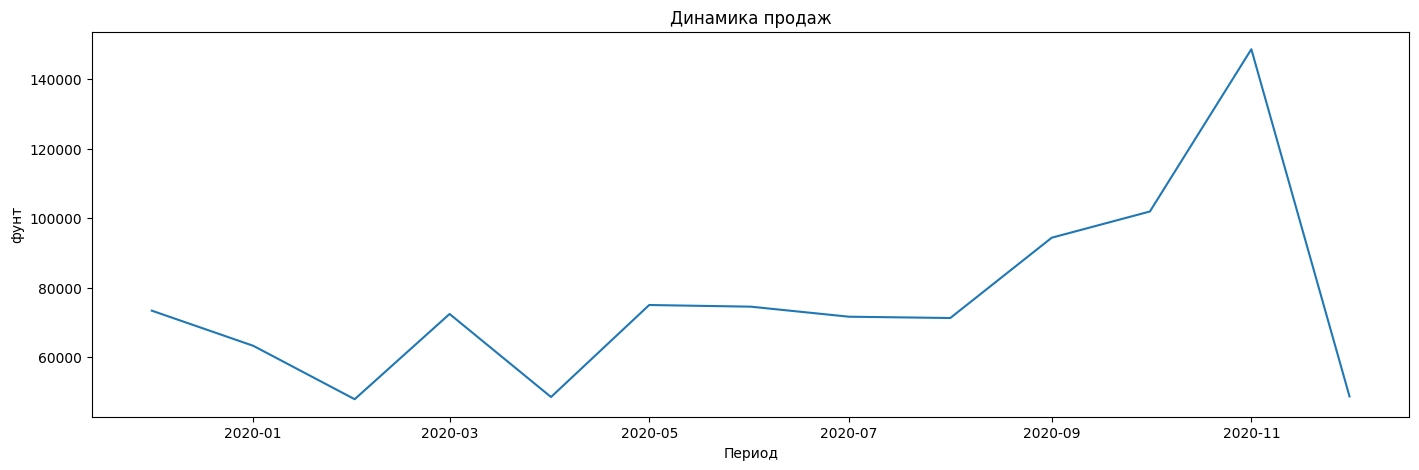

In [35]:
# Общая динамика продаж
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.lineplot(x = t['invoice_month'], y = t['sum'], ax=axs)
plt.title('Динамика продаж')
plt.xlabel('Период')
plt.ylabel('фунт')
plt.show()

In [38]:
sales.groupby('country')['amount'].sum().sort_values(ascending= False).head(10)


country
United Kingdom    842212.24
Netherlands        26177.78
EIRE               25763.17
Germany            20245.20
France             17964.63
Australia          17072.96
Switzerland         5689.30
Spain               5535.58
Sweden              3628.52
Belgium             3594.06
Name: amount, dtype: float64

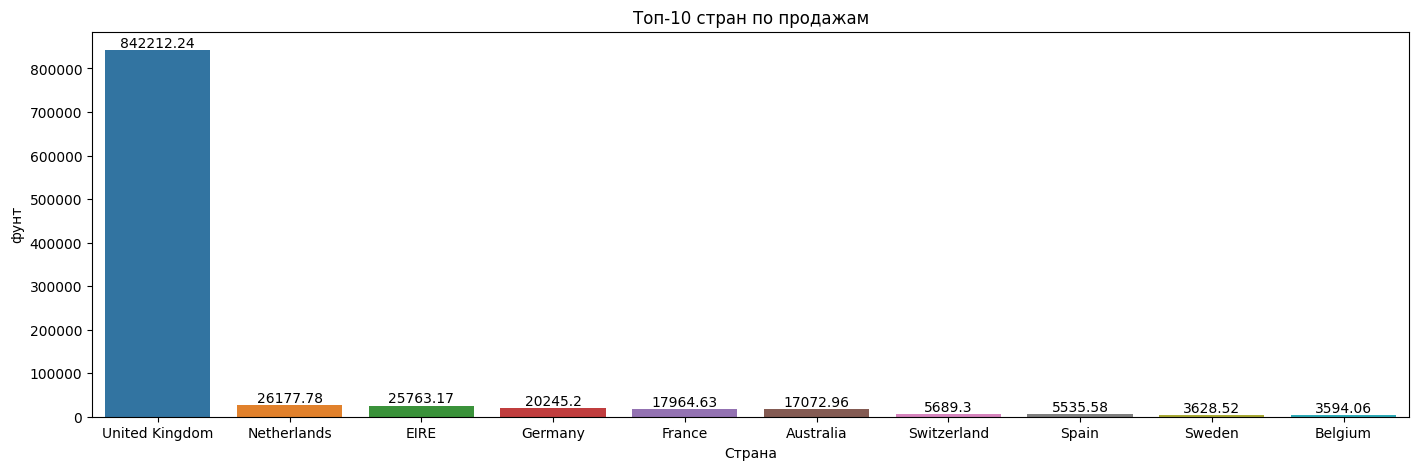

In [44]:
# Продажи по странам
country = sales.groupby('country')['amount'].sum().sort_values(ascending= False).head(10)
fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = country.index, y = country.values, ax=axs)

for i, value in enumerate(country.values):
    ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.title('Топ-10 стран по продажам')
plt.xlabel('Страна')
plt.ylabel('фунт')
plt.show()

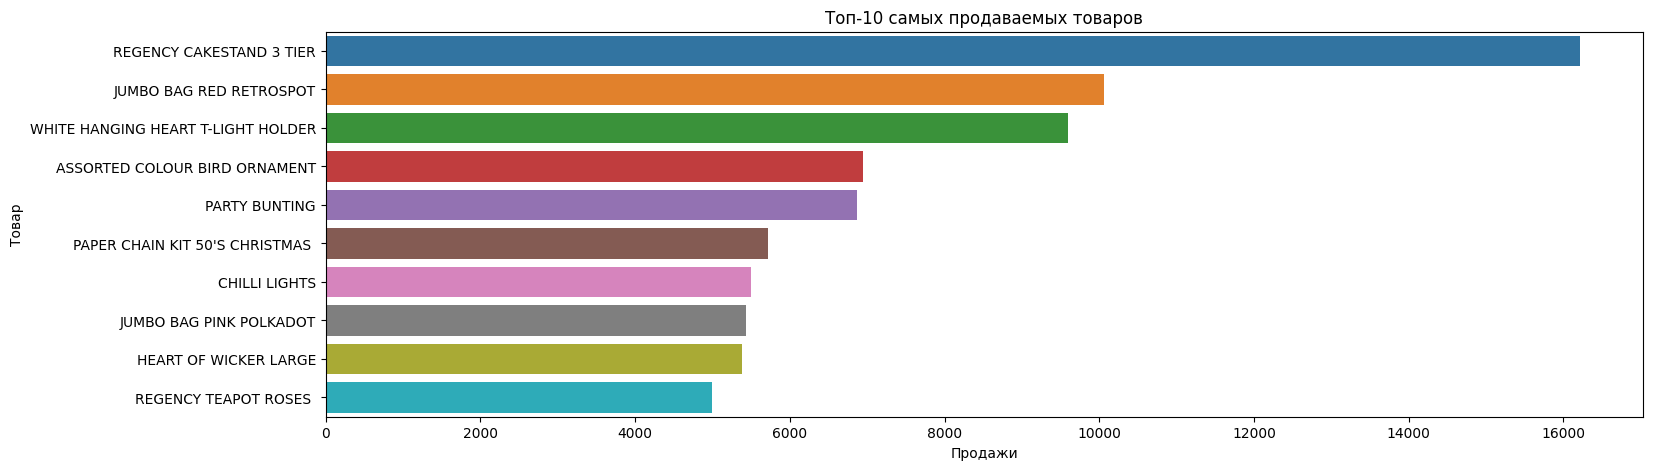

In [51]:
# Топ-10 самых продаваемых товаров
top_prod = sales.groupby('description')['amount'].sum().sort_values(ascending= False).head(10)

fig, axs = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = top_prod.values, y = top_prod.index, ax=axs)

for i, value in enumerate(top_prod.values):
    ax.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.title('Топ-10 самых продаваемых товаров')
plt.xlabel('Продажи')
plt.ylabel('Товар')
plt.show()

In [47]:
# Исключим всех покупателей с амазона
sales_market = sales[sales['customer_id'] !=0]

# Таблица продаж

In [48]:
sales_market

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,amount
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,2019-12-01,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,2019-12-01,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,5.95,13047.0,United Kingdom,2019-12-01,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,4.95,13047.0,United Kingdom,2019-12-01,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,2.75,17850.0,United Kingdom,2019-12-01,22.00
...,...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2020-12-09 12:31:00,0.85,15804.0,United Kingdom,2020-12-01,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,2020-12-09 12:31:00,2.08,15804.0,United Kingdom,2020-12-01,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2020-12-09 12:31:00,0.42,15804.0,United Kingdom,2020-12-01,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2020-12-09 12:50:00,1.95,12680.0,France,2020-12-01,23.40


In [63]:
t = sales_market.groupby('invoice_month')['amount'].agg(['count', 'sum']).reset_index()
t

,invoice_month,count,sum
0,2019-12-01,2685,53071.88
1,2020-01-01,2213,51659.72
2,2020-02-01,2038,41335.97
3,2020-03-01,2753,59473.50
4,2020-04-01,2241,42367.05
5,2020-05-01,2864,68226.48
6,2020-06-01,2740,66483.81
7,2020-07-01,2666,62573.84
8,2020-08-01,2834,61651.97
9,2020-09-01,4086,85319.51


In [64]:
# минимальная и максимальная дата
min_dt = sales_market['invoice_month'].min()
max_dt = sales_market['invoice_month'].max()

In [65]:
# генерим диапазон дат по месяцам
dt = pd.DataFrame(pd.date_range(min_dt, max_dt, freq='MS'))
dt.columns = ['month']
dt

,month
0,2019-12-01
1,2020-01-01
2,2020-02-01
3,2020-03-01
4,2020-04-01
5,2020-05-01
6,2020-06-01
7,2020-07-01
8,2020-08-01
9,2020-09-01


In [66]:
# соединяем со сводной таблицей
dt.merge(t, how= 'left', left_on='month', right_on='invoice_month')

,month,invoice_month,count,sum
0,2019-12-01,2019-12-01,2685,53071.88
1,2020-01-01,2020-01-01,2213,51659.72
2,2020-02-01,2020-02-01,2038,41335.97
3,2020-03-01,2020-03-01,2753,59473.50
4,2020-04-01,2020-04-01,2241,42367.05
5,2020-05-01,2020-05-01,2864,68226.48
6,2020-06-01,2020-06-01,2740,66483.81
7,2020-07-01,2020-07-01,2666,62573.84
8,2020-08-01,2020-08-01,2834,61651.97
9,2020-09-01,2020-09-01,4086,85319.51


# Таблица на каждого юзера на каждый месяц

In [67]:
# Таблица на каждого юзера (дата и месяц регистрации)
users = sales_market.groupby('customer_id')[['invoice_date', 'invoice_month']].min().reset_index()

In [68]:
users.columns = ['customer_id', 'reg_date', 'reg_month']

In [69]:
users

,customer_id,reg_date,reg_month
0,12347.0,2019-12-07 14:57:00,2019-12-01
1,12348.0,2019-12-16 19:09:00,2019-12-01
2,12349.0,2020-11-21 09:51:00,2020-11-01
3,12350.0,2020-02-02 16:01:00,2020-02-01
4,12352.0,2020-02-16 12:33:00,2020-02-01
...,...,...,...
3807,18278.0,2020-09-27 11:58:00,2020-09-01
3808,18281.0,2020-06-12 10:53:00,2020-06-01
3809,18282.0,2020-08-05 13:35:00,2020-08-01
3810,18283.0,2020-01-06 14:14:00,2020-01-01


In [70]:
# Активность покупателей
dt = pd.DataFrame(pd.date_range(min_dt, max_dt, freq='MS'))
dt.columns = ['month']
dt

,month
0,2019-12-01
1,2020-01-01
2,2020-02-01
3,2020-03-01
4,2020-04-01
5,2020-05-01
6,2020-06-01
7,2020-07-01
8,2020-08-01
9,2020-09-01


In [71]:
dt['key'] = 1

In [72]:
users['key'] = 1

In [73]:
template = dt.merge(users, on= 'key')[['month', 'customer_id', 'reg_date', 'reg_month']]
template

,month,customer_id,reg_date,reg_month
0,2019-12-01,12347.0,2019-12-07 14:57:00,2019-12-01
1,2019-12-01,12348.0,2019-12-16 19:09:00,2019-12-01
2,2019-12-01,12349.0,2020-11-21 09:51:00,2020-11-01
3,2019-12-01,12350.0,2020-02-02 16:01:00,2020-02-01
4,2019-12-01,12352.0,2020-02-16 12:33:00,2020-02-01
...,...,...,...,...
49551,2020-12-01,18278.0,2020-09-27 11:58:00,2020-09-01
49552,2020-12-01,18281.0,2020-06-12 10:53:00,2020-06-01
49553,2020-12-01,18282.0,2020-08-05 13:35:00,2020-08-01
49554,2020-12-01,18283.0,2020-01-06 14:14:00,2020-01-01


In [74]:
# убираем те строки, которые до даты регистрации
template = template[template['month'] >= template['reg_month']]
template

,month,customer_id,reg_date,reg_month
0,2019-12-01,12347.0,2019-12-07 14:57:00,2019-12-01
1,2019-12-01,12348.0,2019-12-16 19:09:00,2019-12-01
18,2019-12-01,12370.0,2019-12-14 12:58:00,2019-12-01
24,2019-12-01,12377.0,2019-12-20 09:37:00,2019-12-01
29,2019-12-01,12383.0,2019-12-22 14:28:00,2019-12-01
...,...,...,...,...
49551,2020-12-01,18278.0,2020-09-27 11:58:00,2020-09-01
49552,2020-12-01,18281.0,2020-06-12 10:53:00,2020-06-01
49553,2020-12-01,18282.0,2020-08-05 13:35:00,2020-08-01
49554,2020-12-01,18283.0,2020-01-06 14:14:00,2020-01-01


# Выручка на каждого пользователя на каждый месяц

In [75]:
user_month = sales_market.groupby(['customer_id', 'invoice_month'])[['amount','quantity']].sum().reset_index()


In [76]:
user_month.columns

Index(['customer_id', 'invoice_month', 'amount', 'quantity'], dtype='object')

In [77]:
user_month.columns = ['customer_id', 'month', 'amount','quantity']
user_month

,customer_id,month,amount,quantity
0,12347.0,2019-12-01,69.50,26
1,12347.0,2020-01-01,53.25,7
2,12347.0,2020-04-01,44.20,20
3,12347.0,2020-10-01,83.16,72
4,12347.0,2020-12-01,21.68,36
...,...,...,...,...
10438,18283.0,2020-10-01,16.87,11
10439,18283.0,2020-11-01,83.82,67
10440,18283.0,2020-12-01,7.02,5
10441,18287.0,2020-05-01,115.20,64


In [78]:
# проверка
sales_market['amount'].sum()

837122.76

In [79]:
user_month['amount'].sum()

837122.76

# Аналитическая таблица

In [80]:
at = template.merge(user_month, how= 'left', on=['customer_id', 'month'] )


In [81]:
at['amount'].sum()

837122.7599999999

In [82]:
at

,month,customer_id,reg_date,reg_month,amount,quantity
0,2019-12-01,12347.0,2019-12-07 14:57:00,2019-12-01,69.50,26.0
1,2019-12-01,12348.0,2019-12-16 19:09:00,2019-12-01,13.20,24.0
2,2019-12-01,12370.0,2019-12-14 12:58:00,2019-12-01,132.25,83.0
3,2019-12-01,12377.0,2019-12-20 09:37:00,2019-12-01,114.12,88.0
4,2019-12-01,12383.0,2019-12-22 14:28:00,2019-12-01,50.76,84.0
...,...,...,...,...,...,...
31484,2020-12-01,18278.0,2020-09-27 11:58:00,2020-09-01,NaN,NaN
31485,2020-12-01,18281.0,2020-06-12 10:53:00,2020-06-01,NaN,NaN
31486,2020-12-01,18282.0,2020-08-05 13:35:00,2020-08-01,NaN,NaN
31487,2020-12-01,18283.0,2020-01-06 14:14:00,2020-01-01,7.02,5.0


In [83]:
# проверка
at[at['customer_id'] == 18287.0	]

,month,customer_id,reg_date,reg_month,amount,quantity
9253,2020-05-01,18287.0,2020-05-22 10:39:00,2020-05-01,115.20,64.0
11761,2020-06-01,18287.0,2020-05-22 10:39:00,2020-05-01,NaN,NaN
14455,2020-07-01,18287.0,2020-05-22 10:39:00,2020-05-01,NaN,NaN
17305,2020-08-01,18287.0,2020-05-22 10:39:00,2020-05-01,NaN,NaN
20443,2020-09-01,18287.0,2020-05-22 10:39:00,2020-05-01,NaN,NaN
23907,2020-10-01,18287.0,2020-05-22 10:39:00,2020-05-01,43.68,60.0
27676,2020-11-01,18287.0,2020-05-22 10:39:00,2020-05-01,NaN,NaN
31488,2020-12-01,18287.0,2020-05-22 10:39:00,2020-05-01,NaN,NaN


# Добавляем новые показатели в аналитичествую таблицу

In [84]:
sales_market.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country', 'invoice_month', 'amount'],
      dtype='object')

In [85]:
user_month = (sales_market.groupby(['customer_id', 'invoice_month'])
[['amount','quantity','description' ]]
.agg({'amount':'sum','quantity':'sum','description':'nunique'}).reset_index())
user_month.rename({'invoice_month' : 'month'}, axis= 1, inplace=True)
at = template.merge(user_month, how= 'left', on=['customer_id', 'month'] )

# Считаем количество зарегестрированных пользователей
at['user'] = 1

# Количество активных пользователей (nan - не активный 0, 1- активный)
at['active'] = (~at['amount'].isna())*1

# Сколько новых пользователей за месяц (где month = reg_month)
at['new'] = (at['month'] == at['reg_month'])*1

# МЕТРИКИ


* ВЫРУЧКА

In [86]:
at.groupby('month')[['user', 'active', 'new', 'amount','quantity']].sum().reset_index().sort_values('month')

,month,user,active,new,amount,quantity
0,2019-12-01,703,703,703,53071.88,28622.0
1,2020-01-01,1066,588,363,51659.72,27039.0
2,2020-02-01,1381,590,315,41335.97,28188.0
3,2020-03-01,1768,767,387,59473.50,34215.0
4,2020-04-01,2049,681,281,42367.05,26580.0
5,2020-05-01,2287,832,238,68226.48,35337.0
6,2020-06-01,2508,767,221,66483.81,37825.0
7,2020-07-01,2694,753,186,62573.84,36997.0
8,2020-08-01,2850,732,156,61651.97,40578.0
9,2020-09-01,3138,1041,288,85319.51,52617.0


* Среднее количество товаров, которое покупали пользователи каждый месяц

In [87]:
report = (at.groupby('month')[['user', 'active', 'new', 'amount','quantity']]
          .agg({'user':'sum','active':'sum','new':'sum','amount':'sum','quantity': ['sum','mean']})
          .reset_index().sort_values('month'))

In [88]:
report

month  user active  new     amount quantity           
                sum    sum  sum        sum      sum       mean
0  2019-12-01   703    703  703   53071.88  28622.0  40.714083
1  2020-01-01  1066    588  363   51659.72  27039.0  45.984694
2  2020-02-01  1381    590  315   41335.97  28188.0  47.776271
3  2020-03-01  1768    767  387   59473.50  34215.0  44.608866
4  2020-04-01  2049    681  281   42367.05  26580.0  39.030837
5  2020-05-01  2287    832  238   68226.48  35337.0  42.472356
6  2020-06-01  2508    767  221   66483.81  37825.0  49.315515
7  2020-07-01  2694    753  186   62573.84  36997.0  49.132802
8  2020-08-01  2850    732  156   61651.97  40578.0  55.434426
9  2020-09-01  3138   1041  288   85319.51  52617.0  50.544669
10 2020-10-01  3464   1126  326   91855.09  53573.0  47.578153
11 2020-11-01  3769   1372  305  114008.66  69699.0  50.801020
12 2020-12-01  3812    491   43   39095.28  22698.0  46.228106

In [89]:
# flatten multiindex
report.columns = ['_'.join(col).strip() for col in report.columns.values]
report

,month_,user_sum,active_sum,new_sum,amount_sum,quantity_sum,quantity_mean
0,2019-12-01,703,703,703,53071.88,28622.0,40.714083
1,2020-01-01,1066,588,363,51659.72,27039.0,45.984694
2,2020-02-01,1381,590,315,41335.97,28188.0,47.776271
3,2020-03-01,1768,767,387,59473.50,34215.0,44.608866
4,2020-04-01,2049,681,281,42367.05,26580.0,39.030837
5,2020-05-01,2287,832,238,68226.48,35337.0,42.472356
6,2020-06-01,2508,767,221,66483.81,37825.0,49.315515
7,2020-07-01,2694,753,186,62573.84,36997.0,49.132802
8,2020-08-01,2850,732,156,61651.97,40578.0,55.434426
9,2020-09-01,3138,1041,288,85319.51,52617.0,50.544669


# Количество уникальных наименований, который покупают пользователи

In [92]:
report = (at.groupby('month')[['user', 'active', 'new', 'amount','quantity','description']]
          .agg({'user':'sum','active':'sum','new':'sum','amount':'sum','quantity': ['sum','mean'], 'description':'mean'})
          .reset_index().sort_values('month'))
report.columns = ['_'.join(col).strip() for col in report.columns.values]
report

,month_,user_sum,active_sum,new_sum,amount_sum,quantity_sum,quantity_mean,description_mean
0,2019-12-01,703,703,703,53071.88,28622.0,40.714083,3.748222
1,2020-01-01,1066,588,363,51659.72,27039.0,45.984694,3.717687
2,2020-02-01,1381,590,315,41335.97,28188.0,47.776271,3.427119
3,2020-03-01,1768,767,387,59473.50,34215.0,44.608866,3.552803
4,2020-04-01,2049,681,281,42367.05,26580.0,39.030837,3.264317
5,2020-05-01,2287,832,238,68226.48,35337.0,42.472356,3.395433
6,2020-06-01,2508,767,221,66483.81,37825.0,49.315515,3.528031
7,2020-07-01,2694,753,186,62573.84,36997.0,49.132802,3.508632
8,2020-08-01,2850,732,156,61651.97,40578.0,55.434426,3.831967
9,2020-09-01,3138,1041,288,85319.51,52617.0,50.544669,3.889529


In [94]:
report[['amount_sum', 'quantity_sum', 'quantity_mean', 'description_mean']] = report[['amount_sum', 'quantity_sum', 'quantity_mean', 'description_mean']].round(2)
report

,month_,user_sum,active_sum,new_sum,amount_sum,quantity_sum,quantity_mean,description_mean
0,2019-12-01,703,703,703,53071.88,28622.0,40.71,3.75
1,2020-01-01,1066,588,363,51659.72,27039.0,45.98,3.72
2,2020-02-01,1381,590,315,41335.97,28188.0,47.78,3.43
3,2020-03-01,1768,767,387,59473.50,34215.0,44.61,3.55
4,2020-04-01,2049,681,281,42367.05,26580.0,39.03,3.26
5,2020-05-01,2287,832,238,68226.48,35337.0,42.47,3.40
6,2020-06-01,2508,767,221,66483.81,37825.0,49.32,3.53
7,2020-07-01,2694,753,186,62573.84,36997.0,49.13,3.51
8,2020-08-01,2850,732,156,61651.97,40578.0,55.43,3.83
9,2020-09-01,3138,1041,288,85319.51,52617.0,50.54,3.89


In [97]:
report.rename(columns = {'month_': 'период', 'user_sum': 'общее кол-во покупателей', 'active_sum': 'активные покупатели',
                         'new_sum': 'новые покупатели', 'amount_sum': 'Сумма продаж', 'quantity_sum': 'кол-во товаров',
                         'quantity_mean': 'среднее кол-во товаров', 'description_mean': 'среднее кол-во уникальных товаров в чеке'}, inplace=True)
report


,период,общее кол-во покупателей,активные покупатели,новые покупатели,Сумма продаж,кол-во товаров,среднее кол-во товаров,среднее кол-во уникальных товаров в чеке
0,2019-12-01,703,703,703,53071.88,28622.0,40.71,3.75
1,2020-01-01,1066,588,363,51659.72,27039.0,45.98,3.72
2,2020-02-01,1381,590,315,41335.97,28188.0,47.78,3.43
3,2020-03-01,1768,767,387,59473.50,34215.0,44.61,3.55
4,2020-04-01,2049,681,281,42367.05,26580.0,39.03,3.26
5,2020-05-01,2287,832,238,68226.48,35337.0,42.47,3.40
6,2020-06-01,2508,767,221,66483.81,37825.0,49.32,3.53
7,2020-07-01,2694,753,186,62573.84,36997.0,49.13,3.51
8,2020-08-01,2850,732,156,61651.97,40578.0,55.43,3.83
9,2020-09-01,3138,1041,288,85319.51,52617.0,50.54,3.89
